In [3]:
!pip install faker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.2 MB/s eta 0:00:00


In [4]:
import random
from faker import Faker
from datetime import datetime

# Initialize Faker
fake = Faker()
!pip install pandas
!pip install matplotlib
!pip install seaborn


# **Create Tables and insert required data inside each tables / Database Setup of Sichuan University**

# 1. Create students table and insert 300 random touples for the table usign python

In [5]:
import sqlite3
import random

DB_NAME = 'student_management.db'

# Function to drop and create the students table
def create_students_table():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # Drop existing students table if it exists
    cursor.execute('DROP TABLE IF EXISTS students')

    # Create students table with the specified schema
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS students (
        student_id INTEGER PRIMARY KEY,
        name TEXT NOT NULL,
        year_of_enrollment INTEGER NOT NULL,
        major TEXT NOT NULL,
        gender TEXT NOT NULL,
        date_of_birth TEXT NOT NULL,
        region TEXT NOT NULL,
        email TEXT NOT NULL
    )
    ''')

    conn.commit()
    conn.close()

# Function to generate random student data
def generate_random_student_data(num_records):
    students = []
    names = ['Sam', 'Jemmy', 'Akash', 'John', 'Jane', 'Emma', 'Liam', 'Olivia', 'Noah', 'Ava', 'William', 'Sophia', 'James', 'Isabella', 'Logan', 'Mia']
    majors = ['Computer Science', 'Electrical Engineering', 'Mechanical Engineering', 'Physics', 'Mathematics']
    regions = ['USA', 'Canada', 'UK', 'Germany', 'France', 'China', 'Japan', 'India', 'Brazil', 'Australia']
    for i in range(num_records):
        year_of_enrollment = random.choice([2019, 2020, 2021, 2022, 2023, 2024])
        incremental_id = year_of_enrollment + 521460100 + i
        student_id = int(f"{year_of_enrollment}{incremental_id}")
        name = random.choice(names)
        major = random.choice(majors)
        gender = random.choice(['Male', 'Female'])
        date_of_birth = f"{random.randint(1980, 2005)}-{random.randint(1, 12):02d}-{random.randint(1, 28):02d}"
        region = random.choice(regions)
        email = f"{student_id}@stu.scu.edu.cn"
        students.append((student_id, name, year_of_enrollment, major, gender, date_of_birth, region, email))
    return students

# Function to insert data into the students table
def bulk_insert_students(students):
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()

        cursor.executemany('''
        INSERT OR REPLACE INTO students (student_id, name, year_of_enrollment, major, gender, date_of_birth, region, email)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        ''', students)

        conn.commit()
    except sqlite3.Error as e:
        print("An error occurred:", e)
    finally:
        if conn:
            conn.close()

# Function to verify the number of records in the students table
def verify_data(table_name):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute(f'SELECT COUNT(*) FROM {table_name}')
    count = cursor.fetchone()[0]
    conn.close()
    return count

# Create the students table
create_students_table()
print("Students table created successfully.")

# Generate 300 random student records
students = generate_random_student_data(300)

# Insert the generated student data into the database
bulk_insert_students(students)
print("300 records inserted into students table.")

# Verify the number of records in the students table
print("Number of records in students table:", verify_data('students'))


Students table created successfully.
300 records inserted into students table.
Number of records in students table: 300


# Show all the touples of students table

In [73]:
# Install pandas
!pip install pandas

import sqlite3
import pandas as pd

# Function to fetch all data from the students table
def fetch_all_students():
    conn = sqlite3.connect('student_management.db')
    query = 'SELECT * FROM students'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Fetch the data
students_df = fetch_all_students()

# Display the data as a table
students_df


student_id     name  year_of_enrollment                   major  \
0       2022129145   Olivia                2018  Mechanical Engineering   
1       2022143394   Olivia                2018  Mechanical Engineering   
2       2022165696     Emma                2020        Computer Science   
3       2022173387  Michael                2018        Computer Science   
4       2022178098     Jane                2023        Computer Science   
..             ...      ...                 ...                     ...   
346  2024521462392    James                2024        Computer Science   
347  2024521462395     Emma                2024  Electrical Engineering   
348  2024521462417    Logan                2024        Computer Science   
349  2024521462418     Noah                2024  Mechanical Engineering   
350  2024521462423     John                2024                 Physics   

     gender date_of_birth   region                         email  
0    Female    11/01/1990       UK        2022129145@example.com  
1      Male    30/06/1979       UK        2022143394@example.com  
2      Male    25/10/1966   Canada        2022165696@example.com  
3      Male    12/03/1997   Canada        2022173387@example.com  
4    Female    16/11/1973       UK        2022178098@example.com  
..      ...           ...      ...                           ...  
346    Male    1991-03-06   France  2024521462392@stu.scu.edu.cn  
347    Male    2000-04-16       UK  2024521462395@stu.scu.edu.cn  
348    Male    1981-09-10   France  2024521462417@stu.scu.edu.cn  
349  Female    1989-07-10  Germany  2024521462418@stu.scu.edu.cn  
350    Male    2002-07-14    Japan  2024521462423@stu.scu.edu.cn  

[351 rows x 8 columns]

from matplotlib import pyplot as plt
students_df['student_id'].plot(kind='hist', bins=20, title='student_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
students_df['year_of_enrollment'].plot(kind='hist', bins=20, title='year_of_enrollment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
students_df.groupby('major').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
students_df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
students_df.plot(kind='scatter', x='student_id', y='year_of_enrollment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['student_id']
  ys = series['year_of_enrollment']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = students_df.sort_values('student_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('major')):
  _plot_series(series, series_name, i)
  fig.legend(title='major', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('student_id')
_ = plt.ylabel('year_of_enrollment')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['student_id']
  ys = series['year_of_enrollment']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = students_df.sort_values('student_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('student_id')
_ = plt.ylabel('year_of_enrollment')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['student_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'student_id'}, axis=1)
              .sort_values('student_id', ascending=True))
  xs = counted['student_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = students_df.sort_values('student_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('major')):
  _plot_series(series, series_name, i)
  fig.legend(title='major', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('student_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['student_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'student_id'}, axis=1)
              .sort_values('student_id', ascending=True))
  xs = counted['student_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = students_df.sort_values('student_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('student_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
students_df['student_id'].plot(kind='line', figsize=(8, 4), title='student_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
students_df['year_of_enrollment'].plot(kind='line', figsize=(8, 4), title='year_of_enrollment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['gender'].value_counts()
    for x_label, grp in students_df.groupby('major')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('major')
_ = plt.ylabel('gender')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(students_df['major'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(students_df, x='student_id', y='major', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(students_df['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(students_df, x='student_id', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(students_df['major'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(students_df, x='year_of_enrollment', y='major', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(students_df['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(students_df, x='year_of_enrollment', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# 2. Create course table and insert 20 course names and other related values for the table

In [7]:
import sqlite3
import random
import string

DB_NAME = 'student_management.db'

# Function to drop and create the courses table
def create_courses_table():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # Drop existing courses table if it exists
    cursor.execute('DROP TABLE IF EXISTS courses')

    # Create courses table with the specified schema
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS courses (
        course_id INTEGER PRIMARY KEY AUTOINCREMENT,
        course_name TEXT NOT NULL,
        course_code TEXT NOT NULL,
        credits INTEGER NOT NULL,
        semester TEXT NOT NULL
    )
    ''')

    conn.commit()
    conn.close()

# Function to generate random course data
def generate_random_course_data(num_records):
    courses = []
    course_names = [
        'Introduction to Programming', 'Data Structures', 'Algorithms', 'Databases', 'Computer Networks',
        'Operating Systems', 'Artificial Intelligence', 'Machine Learning', 'Software Engineering', 'Cyber Security',
        'Discrete Mathematics', 'Linear Algebra', 'Calculus', 'Statistics', 'Physics for Engineers'
    ]
    semesters = ['Fall', 'Spring', 'Summer']  # Added 'Spring' to diversify semester options
    for i in range(num_records):
        course_name = random.choice(course_names)
        course_code = ''.join(random.choices(string.ascii_uppercase + string.digits, k=6))
        credits = random.choice([3, 4])
        semester = random.choice(semesters)
        courses.append((course_name, course_code, credits, semester))
    return courses

# Function to insert data into the courses table
def bulk_insert_courses(courses):
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()

        cursor.executemany('''
        INSERT OR REPLACE INTO courses (course_name, course_code, credits, semester)
        VALUES (?, ?, ?, ?)
        ''', courses)

        conn.commit()
    except sqlite3.Error as e:
        print("An error occurred:", e)
    finally:
        if conn:
            conn.close()

# Function to verify the number of records in the courses table
def verify_data(table_name):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute(f'SELECT COUNT(*) FROM {table_name}')
    count = cursor.fetchone()[0]
    conn.close()
    return count

# Create the courses table
create_courses_table()
print("Courses table created successfully.")

# Generate 20 random course records
courses = generate_random_course_data(20)

# Insert the generated course data into the database
bulk_insert_courses(courses)
print("20 records inserted into courses table.")

# Verify the number of records in the courses table
print("Number of records in courses table:", verify_data('courses'))


Courses table created successfully.
20 records inserted into courses table.
Number of records in courses table: 20


# Display all course table

In [72]:
DB_NAME = 'student_management.db'

# Function to fetch all data from the students table
def fetch_all_students():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM students'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Function to fetch all data from the courses table
def fetch_all_courses():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM courses'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Fetch the data
students_df = fetch_all_students()
courses_df = fetch_all_courses()

# Display the data as a table

print("Courses Table:")
display(courses_df)

Courses Table:


course_id                  course_name course_code  credits semester
0           1      Artificial Intelligence      KCQWCR        3   Summer
1           2                   Statistics      5YRSU6        4     Fall
2           3               Linear Algebra      NVBTYA        4   Summer
3           4             Machine Learning      XFHMU1        4   Spring
4           5      Artificial Intelligence      64N6SX        3   Summer
5           6                     Calculus      WAFDAF        3   Spring
6           7        Physics for Engineers      176B1P        3     Fall
7           8                   Algorithms      JPCQ6C        3   Spring
8           9                    Databases      NUF0YF        4     Fall
9          10  Introduction to Programming      XF08E3        3   Spring
10         11                   Statistics      ZVAGBH        4     Fall
11         12         Discrete Mathematics      9TMKZ1        3   Summer
12         13            Operating Systems      RO402K        4   Summer
13         14      Artificial Intelligence      LXDHH3        3   Spring
14         15                     Calculus      RNH209        3     Fall
15         16         Discrete Mathematics      OJWTDV        4   Spring
16         17         Software Engineering      2ZPS1F        4   Summer
17         18                     Calculus      QSYU70        4   Summer
18         19            Operating Systems      JB4MC9        3   Summer
19         20            Computer Networks      08L17E        4     Fall
20         21              Data Structures      DS5BHA        4   Spring
21         22          Database Management      DB2VOP        3     Fall

from matplotlib import pyplot as plt
_df_31['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['course_id'].plot(kind='hist', bins=20, title='course_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['credits'].plot(kind='hist', bins=20, title='credits')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_34.groupby('semester').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='index', y='course_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='course_id', y='credits', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['credits']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_37.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('semester')):
  _plot_series(series, series_name, i)
  fig.legend(title='semester', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('credits')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('semester')):
  _plot_series(series, series_name, i)
  fig.legend(title='semester', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['course_id']
  ys = series['credits']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('course_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('semester')):
  _plot_series(series, series_name, i)
  fig.legend(title='semester', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('course_id')
_ = plt.ylabel('credits')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['course_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'course_id'}, axis=1)
              .sort_values('course_id', ascending=True))
  xs = counted['course_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('course_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('semester')):
  _plot_series(series, series_name, i)
  fig.legend(title='semester', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('course_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_41['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['course_id'].plot(kind='line', figsize=(8, 4), title='course_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_43['credits'].plot(kind='line', figsize=(8, 4), title='credits')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_44['semester'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_44, x='index', y='semester', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_45['semester'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_45, x='course_id', y='semester', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_46['semester'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_46, x='credits', y='semester', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# 3.Create enrollment table

In [9]:
DB_NAME = 'student_management.db'

# Function to drop and create the enrollments table
def create_enrollments_table():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # Drop existing enrollments table if it exists
    cursor.execute('DROP TABLE IF EXISTS enrollments')

    # Create enrollments table with the specified schema
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS enrollments (
        enrollment_id INTEGER PRIMARY KEY AUTOINCREMENT,
        student_id INTEGER NOT NULL,
        course_id INTEGER NOT NULL,
        FOREIGN KEY (student_id) REFERENCES students (student_id),
        FOREIGN KEY (course_id) REFERENCES courses (course_id),
        UNIQUE(student_id, course_id)
    )
    ''')

    conn.commit()
    conn.close()

# Function to generate random enrollment data
def generate_random_enrollment_data(student_ids, course_ids, num_records):
    enrollments = set()
    while len(enrollments) < num_records:
        student_id = random.choice(student_ids)
        course_id = random.choice(course_ids)
        enrollments.add((student_id, course_id))
    return list(enrollments)

# Function to insert data into the enrollments table
def bulk_insert_enrollments(enrollments):
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()

        cursor.executemany('''
        INSERT OR IGNORE INTO enrollments (student_id, course_id)
        VALUES (?, ?)
        ''', enrollments)

        conn.commit()
    except sqlite3.Error as e:
        print("An error occurred:", e)
    finally:
        if conn:
            conn.close()

# Function to verify the number of records in a table
def verify_data(table_name):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute(f'SELECT COUNT(*) FROM {table_name}')
    count = cursor.fetchone()[0]
    conn.close()
    return count

# Create the enrollments table
create_enrollments_table()
print("Enrollments table created successfully.")

# Get list of student_ids and course_ids for generating enrollments
def fetch_ids(table_name, id_column):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute(f'SELECT {id_column} FROM {table_name}')
    ids = [row[0] for row in cursor.fetchall()]
    conn.close()
    return ids

student_ids = fetch_ids('students', 'student_id')
course_ids = fetch_ids('courses', 'course_id')

# Generate and insert random enrollment data
enrollments = generate_random_enrollment_data(student_ids, course_ids, 300)
bulk_insert_enrollments(enrollments)
print("Data inserted into enrollments table.")

# Verify the number of records in enrollments table
print("Number of records in enrollments table:", verify_data('enrollments'))


Enrollments table created successfully.
Data inserted into enrollments table.
Number of records in enrollments table: 300


# Display enrollment table

In [10]:
DB_NAME = 'student_management.db'

# Function to fetch all data from the students table
def fetch_all_students():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM students'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Function to fetch all data from the courses table
def fetch_all_courses():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM courses'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Function to fetch all data from the enrollments table
def fetch_all_enrollments():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM enrollments'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Fetch the data
students_df = fetch_all_students()
courses_df = fetch_all_courses()
enrollments_df = fetch_all_enrollments()

# Display the data as a table
print("Enrollments Table:")
display(enrollments_df)


Enrollments Table:


enrollment_id     student_id  course_id
0                1  2024521462242         16
1                2  2022521462282         11
2                3  2019521462160         14
3                4  2022521462397          7
4                5  2023521462278         11
..             ...            ...        ...
295            296  2021521462224          6
296            297  2022521462294          1
297            298  2022521462218          9
298            299  2019521462207         19
299            300  2024521462277          7

[300 rows x 3 columns]

from matplotlib import pyplot as plt
enrollments_df['enrollment_id'].plot(kind='hist', bins=20, title='enrollment_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
enrollments_df['student_id'].plot(kind='hist', bins=20, title='student_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
enrollments_df['course_id'].plot(kind='hist', bins=20, title='course_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
enrollments_df.plot(kind='scatter', x='enrollment_id', y='student_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
enrollments_df.plot(kind='scatter', x='student_id', y='course_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['enrollment_id']
  ys = series['student_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = enrollments_df.sort_values('enrollment_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('enrollment_id')
_ = plt.ylabel('student_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['enrollment_id']
  ys = series['course_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = enrollments_df.sort_values('enrollment_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('enrollment_id')
_ = plt.ylabel('course_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['enrollment_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'enrollment_id'}, axis=1)
              .sort_values('enrollment_id', ascending=True))
  xs = counted['enrollment_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = enrollments_df.sort_values('enrollment_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('enrollment_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
enrollments_df['enrollment_id'].plot(kind='line', figsize=(8, 4), title='enrollment_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
enrollments_df['student_id'].plot(kind='line', figsize=(8, 4), title='student_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
enrollments_df['course_id'].plot(kind='line', figsize=(8, 4), title='course_id')
plt.gca().spines[['top', 'right']].set_visible(False)

# 4.Create Professors table and insert random data

In [11]:
import sqlite3
import random

DB_NAME = 'student_management.db'

# Function to drop and create the professors table
def create_professors_table():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # Drop existing professors table if it exists
    cursor.execute('DROP TABLE IF EXISTS professors')

    # Create professors table with the specified schema
    cursor.execute('''
CREATE TABLE IF NOT EXISTS professors (
    professor_id INTEGER PRIMARY KEY,
    professor_name TEXT NOT NULL,
    email TEXT NOT NULL UNIQUE,
    department TEXT NOT NULL,
    course_id INTEGER,
    FOREIGN KEY (course_id) REFERENCES courses (course_id)
)
''')


    conn.commit()
    conn.close()

# Function to generate random professor data
def generate_random_professor_data(num_records, course_ids):
    professors = []
    professor_names = ['Dr. Smith', 'Prof. Johnson', 'Ms. Brown', 'Dr. Lee', 'Prof. Wilson', 'Dr. Taylor', 'Dr. Anderson', 'Prof. White', 'Prof. Harris', 'Dr. Martin', 'Dr. Jackson', 'Prof. Thompson', 'Dr. Garcia', 'Prof. Martinez', 'Dr. Robinson', 'Dr. Clark', 'Prof. Rodriguez', 'Dr. Lewis', 'Prof. Lee', 'Dr. Walker', 'Prof. Hall', 'Dr. Allen', 'Prof. Young', 'Dr. Hernandez', 'Prof. King']
    departments = ['Electrical Engineering', 'Physics', 'Mechanical Engineering', 'Mathematics', 'Computer Science']

    for i in range(num_records):
        professor_name = professor_names[i % len(professor_names)]
        last_name = professor_name.split()[-1]  # Extract last name
        email = f"{last_name.lower()}@scu.edu.cn"
        course_id = course_ids[i % len(course_ids)]
        department = departments[i % len(departments)]  # Assign department cyclically
        professors.append((professor_name, email, department, course_id))

    return professors


# Function to insert data into the professors table
def bulk_insert_professors(professors):
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()

        cursor.executemany('''
        INSERT OR REPLACE INTO professors (professor_name, email, department, course_id)
        VALUES (?, ?, ?, ?)
        ''', professors)

        conn.commit()
    except sqlite3.Error as e:
        print("An error occurred:", e)
    finally:
        if conn:
            conn.close()


# Function to fetch course IDs
def fetch_course_ids():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute('SELECT course_id FROM courses')
    course_ids = [row[0] for row in cursor.fetchall()]
    conn.close()
    return course_ids

# Function to verify the number of records in a table
def verify_data(table_name):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute(f'SELECT COUNT(*) FROM {table_name}')
    count = cursor.fetchone()[0]
    conn.close()
    return count

# Create the professors table
create_professors_table()
print("Professors table created successfully.")

# Fetch course IDs from the courses table
course_ids = fetch_course_ids()

# Generate 25 random professor records
professors = generate_random_professor_data(25, course_ids)

# Insert the generated professor data into the database
bulk_insert_professors(professors)
print("25 records inserted into professors table.")

# Verify the number of records in professors table
print("Number of records in professors table:", verify_data('professors'))


Professors table created successfully.
25 records inserted into professors table.
Number of records in professors table: 24


# Show Professors table with all touples

In [12]:
import sqlite3
import pandas as pd
from IPython.display import display

DB_NAME = 'student_management.db'

# Function to fetch all data from the courses table
def fetch_all_courses():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM courses'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Function to fetch all data from the professors table
def fetch_all_professors():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM professors'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Fetch the data
courses_df = fetch_all_courses()
professors_df = fetch_all_professors()

# Display the professors table
display(professors_df)


professor_id   professor_name                 email  \
0              1        Dr. Smith      smith@scu.edu.cn   
1              2    Prof. Johnson    johnson@scu.edu.cn   
2              3        Ms. Brown      brown@scu.edu.cn   
3              5     Prof. Wilson     wilson@scu.edu.cn   
4              6       Dr. Taylor     taylor@scu.edu.cn   
5              7     Dr. Anderson   anderson@scu.edu.cn   
6              8      Prof. White      white@scu.edu.cn   
7              9     Prof. Harris     harris@scu.edu.cn   
8             10       Dr. Martin     martin@scu.edu.cn   
9             11      Dr. Jackson    jackson@scu.edu.cn   
10            12   Prof. Thompson   thompson@scu.edu.cn   
11            13       Dr. Garcia     garcia@scu.edu.cn   
12            14   Prof. Martinez   martinez@scu.edu.cn   
13            15     Dr. Robinson   robinson@scu.edu.cn   
14            16        Dr. Clark      clark@scu.edu.cn   
15            17  Prof. Rodriguez  rodriguez@scu.edu.cn   
16            18        Dr. Lewis      lewis@scu.edu.cn   
17            19        Prof. Lee        lee@scu.edu.cn   
18            20       Dr. Walker     walker@scu.edu.cn   
19            21       Prof. Hall       hall@scu.edu.cn   
20            22        Dr. Allen      allen@scu.edu.cn   
21            23      Prof. Young      young@scu.edu.cn   
22            24    Dr. Hernandez  hernandez@scu.edu.cn   
23            25       Prof. King       king@scu.edu.cn   

                department  course_id  
0   Electrical Engineering          1  
1                  Physics          2  
2   Mechanical Engineering          3  
3         Computer Science          5  
4   Electrical Engineering          6  
5                  Physics          7  
6   Mechanical Engineering          8  
7              Mathematics          9  
8         Computer Science         10  
9   Electrical Engineering         11  
10                 Physics         12  
11  Mechanical Engineering         13  
12             Mathematics         14  
13        Computer Science         15  
14  Electrical Engineering         16  
15                 Physics         17  
16  Mechanical Engineering         18  
17             Mathematics         19  
18        Computer Science         20  
19  Electrical Engineering          1  
20                 Physics          2  
21  Mechanical Engineering          3  
22             Mathematics          4  
23        Computer Science          5

from matplotlib import pyplot as plt
professors_df['professor_id'].plot(kind='hist', bins=20, title='professor_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
professors_df['course_id'].plot(kind='hist', bins=20, title='course_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
professors_df.groupby('department').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
professors_df.plot(kind='scatter', x='professor_id', y='course_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['professor_id']
  ys = series['course_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = professors_df.sort_values('professor_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('department')):
  _plot_series(series, series_name, i)
  fig.legend(title='department', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('professor_id')
_ = plt.ylabel('course_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['professor_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'professor_id'}, axis=1)
              .sort_values('professor_id', ascending=True))
  xs = counted['professor_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = professors_df.sort_values('professor_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('department')):
  _plot_series(series, series_name, i)
  fig.legend(title='department', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('professor_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
professors_df['professor_id'].plot(kind='line', figsize=(8, 4), title='professor_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
professors_df['course_id'].plot(kind='line', figsize=(8, 4), title='course_id')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(professors_df['department'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(professors_df, x='professor_id', y='department', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(professors_df['department'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(professors_df, x='course_id', y='department', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# 5.Accommodation Table where each student having a accommodation room

In [13]:
import sqlite3
import random

DB_NAME = 'student_management.db'

def create_accommodations_table():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # Drop existing accommodations table if it exists
    cursor.execute('DROP TABLE IF EXISTS accommodations')

    # Create accommodations table with the specified schema
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS accommodations (
        accommodation_id INTEGER PRIMARY KEY,
        student_id INTEGER NOT NULL,
        room_number TEXT NOT NULL,
        building_name TEXT NOT NULL,
        FOREIGN KEY (student_id) REFERENCES students (student_id)
    )
    ''')

    conn.commit()
    conn.close()

# Create the accommodations table
create_accommodations_table()
print("Accommodations table created successfully.")

import sqlite3
import random

DB_NAME = 'student_management.db'

def insert_accommodations():
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()

        # Get all student IDs
        cursor.execute('SELECT student_id FROM students')
        student_ids = [row[0] for row in cursor.fetchall()]

        # Generate and insert data for 300 students across 10 buildings
        accommodations = []
        buildings = ['Building 1', 'Building 2', 'Building 3', 'Building 4', 'Building 5',
                     'Building 6', 'Building 7', 'Building 8', 'Building 9', 'Building 10']
        rooms_per_building = 30

        for student_id in random.sample(student_ids, len(student_ids)):
            building_name = random.choice(buildings)
            room_number = f"{random.choice(['A', 'B'])}{random.randint(1, rooms_per_building):02d}"
            accommodations.append((student_id, room_number, building_name))

        # Insert data into accommodations table
        cursor.executemany('''
        INSERT INTO accommodations (student_id, room_number, building_name)
        VALUES (?, ?, ?)
        ''', accommodations)

        conn.commit()
        print("Accommodations inserted successfully.")
    except sqlite3.Error as e:
        print("An error occurred:", e)
    finally:
        if conn:
            conn.close()

# Insert accommodations data
insert_accommodations()



Accommodations table created successfully.
Accommodations inserted successfully.


# Display accommodation data

In [14]:
# Function to fetch all data from the students table
def fetch_all_students():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM students'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

    # Function to fetch all data from the accommodations table
def fetch_all_accommodations():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM accommodations'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df


    # Fetch the data
students_df = fetch_all_students()
accommodations_df = fetch_all_accommodations()

# Display the data as a table
print("accommodations Table:")
display(accommodations_df)

accommodations Table:


accommodation_id     student_id room_number building_name
0                   1  2023521462333         B14    Building 1
1                   2  2022521462397         A07    Building 6
2                   3  2020521462417         B23    Building 4
3                   4  2019521462296         B17    Building 6
4                   5  2021521462259         B22    Building 2
..                ...            ...         ...           ...
295               296  2020521462284         B18    Building 9
296               297  2023521462135         A21    Building 7
297               298  2020521462181         A25    Building 7
298               299  2024521462202         B21    Building 6
299               300  2024521462375         A25   Building 10

[300 rows x 4 columns]

from matplotlib import pyplot as plt
_df_47['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48['accommodation_id'].plot(kind='hist', bins=20, title='accommodation_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49['student_id'].plot(kind='hist', bins=20, title='student_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50.plot(kind='scatter', x='index', y='accommodation_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51.plot(kind='scatter', x='accommodation_id', y='student_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['student_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_52.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('student_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_53.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accommodation_id']
  ys = series['student_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_54.sort_values('accommodation_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accommodation_id')
_ = plt.ylabel('student_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['accommodation_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'accommodation_id'}, axis=1)
              .sort_values('accommodation_id', ascending=True))
  xs = counted['accommodation_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_55.sort_values('accommodation_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accommodation_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_56['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_57['accommodation_id'].plot(kind='line', figsize=(8, 4), title='accommodation_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_58['student_id'].plot(kind='line', figsize=(8, 4), title='student_id')
plt.gca().spines[['top', 'right']].set_visible(False)

# 6. Create a table for Book where students buy books for the related course and register/update his or her information

In [15]:
import sqlite3
import random

DB_NAME = 'student_management.db'

# Function to drop and create the books table
def create_books_table():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # Drop existing books table if it exists
    cursor.execute('DROP TABLE IF EXISTS books')

    # Create books table with the specified schema
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS books (
        book_id INTEGER PRIMARY KEY,
        student_id INTEGER NOT NULL,
        course_id INTEGER NOT NULL,
        book_name TEXT NOT NULL,
        author TEXT NOT NULL,
        price REAL NOT NULL,
        FOREIGN KEY (student_id) REFERENCES students (student_id),
        FOREIGN KEY (course_id) REFERENCES courses (course_id)
    )
    ''')

    conn.commit()
    conn.close()

# Function to fetch random student IDs from the students table
def fetch_random_student_ids(num_students):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    cursor.execute('SELECT student_id FROM students ORDER BY RANDOM() LIMIT ?', (num_students,))
    student_ids = [row[0] for row in cursor.fetchall()]

    conn.close()
    return student_ids

# Function to generate random book details
def generate_random_books(course_names, num_books_per_course=5):
    books = []
    authors = [
        'Thomas H. Cormen', 'Stuart J. Russell', 'Peter Norvig', 'Andrew S. Tanenbaum', 'Herbert Schildt',
        'H. John Heinz III', 'Michael J. Folk', 'David R. Cheriton', 'Shai Shalev-Shwartz', 'Shai Ben-David'
    ]

    for course_name in course_names:
        for _ in range(num_books_per_course):
            book_name = course_name
            author = random.choice(authors)
            price = round(random.uniform(20.0, 100.0), 2)
            books.append((book_name, author, price))

    return books

# Function to insert random books into the books table
def insert_random_books():
    course_names = [
        'Calculus', 'Cyber Security', 'Artificial Intelligence', 'Cyber Security', 'Databases',
        'Calculus', 'Computer Networks', 'Machine Learning', 'Algorithms', 'Cyber Security',
        'Algorithms', 'Calculus', 'Computer Networks', 'Machine Learning', 'Databases',
        'Discrete Mathematics', 'Machine Learning', 'Algorithms', 'Artificial Intelligence'
    ]

    # Fetch random student IDs from the students table
    num_students = random.randint(10, 12)
    student_ids = fetch_random_student_ids(num_students)

    # Generate random books
    books = generate_random_books(course_names)

    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()

        # Insert random books into the books table
        for book in books:
            student_id = random.choice(student_ids)
            course_id = random.randint(1, 20)  # Assuming there are 20 courses
            cursor.execute('''
            INSERT INTO books (student_id, course_id, book_name, author, price)
            VALUES (?, ?, ?, ?, ?)
            ''', (student_id, course_id, book[0], book[1], book[2]))

        conn.commit()
        print("Random books inserted successfully.")
    except sqlite3.Error as e:
        print("An error occurred:", e)
    finally:
        if conn:
            conn.close()

# Create the books table
create_books_table()
print("Books table created successfully.")

# Insert random books into the books table
insert_random_books()


Books table created successfully.
Random books inserted successfully.


# Display Books table

In [74]:
DB_NAME = 'student_management.db'

# Function to fetch all data from the students table
def fetch_all_students():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM students'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Function to fetch all data from the courses table
def fetch_all_courses():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM courses'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df
# Function to fetch all data from the books table
def fetch_all_books():
    conn = sqlite3.connect(DB_NAME)
    query = '''
    SELECT book_id, student_id, course_id, book_name, author, '¥' || CAST(price AS TEXT) AS price
    FROM books
    '''
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Fetch the data
students_df = fetch_all_students()
courses_df = fetch_all_courses()
books_df = fetch_all_books()

# Display the data as a table
print("books Table:")
display(books_df)


books Table:


book_id     student_id  course_id                book_name  \
0         1  2022521462244         11                 Calculus   
1         2  2022521462265          8                 Calculus   
2         3  2022521462244         12                 Calculus   
3         4  2023521462151         10                 Calculus   
4         5  2022521462403         19                 Calculus   
..      ...            ...        ...                      ...   
91       92  2024521462242         20  Artificial Intelligence   
92       93  2024521462169         14  Artificial Intelligence   
93       94  2024521462242         10  Artificial Intelligence   
94       95  2024521462242          4  Artificial Intelligence   
95       96  2023521462375         17         Machine Learning   

                 author   price  
0        Shai Ben-David   ¥75.7  
1        Shai Ben-David   ¥86.4  
2          Peter Norvig  ¥27.69  
3       Herbert Schildt   ¥22.1  
4     H. John Heinz III  ¥88.23  
..                  ...     ...  
91  Andrew S. Tanenbaum  ¥56.81  
92    Stuart J. Russell  ¥30.58  
93  Shai Shalev-Shwartz  ¥55.03  
94  Shai Shalev-Shwartz  ¥35.55  
95    Stuart J. Russell  ¥21.97  

[96 rows x 6 columns]

from matplotlib import pyplot as plt
_df_59['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_60['book_id'].plot(kind='hist', bins=20, title='book_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_61['student_id'].plot(kind='hist', bins=20, title='student_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_62['course_id'].plot(kind='hist', bins=20, title='course_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_63.groupby('book_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_64.plot(kind='scatter', x='index', y='book_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_65.plot(kind='scatter', x='book_id', y='student_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_66.plot(kind='scatter', x='student_id', y='course_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['student_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_67.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('book_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='book_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('student_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['course_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_68.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('book_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='book_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('course_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_69.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('book_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='book_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['book_id']
  ys = series['student_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_70.sort_values('book_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('book_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='book_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('book_id')
_ = plt.ylabel('student_id')

from matplotlib import pyplot as plt
_df_71['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_72['book_id'].plot(kind='line', figsize=(8, 4), title='book_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_73['student_id'].plot(kind='line', figsize=(8, 4), title='student_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_74['course_id'].plot(kind='line', figsize=(8, 4), title='course_id')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_75['book_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_75, x='index', y='book_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_76['book_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_76, x='book_id', y='book_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_77['book_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_77, x='student_id', y='book_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_78['book_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_78, x='course_id', y='book_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# 7. Create a table for result to put student's evaluation score after exams

In [48]:

DB_NAME = 'student_management.db'

# Function to drop and create the results table
def create_results_table():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # Drop existing results table if it exists
    cursor.execute('DROP TABLE IF EXISTS results')

    # Create results table with the specified schema
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS results (
        result_id INTEGER PRIMARY KEY AUTOINCREMENT,
        student_id INTEGER NOT NULL,
        course_id INTEGER NOT NULL,
        score REAL NOT NULL,
        FOREIGN KEY (student_id) REFERENCES students (student_id),
        FOREIGN KEY (course_id) REFERENCES courses (course_id)
    )
    ''')

    conn.commit()
    conn.close()

# Function to insert data into the results table
def insert_results_data(results):
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()

        cursor.executemany('''
        INSERT INTO results (student_id, course_id, score)
        VALUES (?, ?, ?)
        ''', results)

        conn.commit()
    except sqlite3.Error as e:
        print("An error occurred:", e)
    finally:
        if conn:
            conn.close()

# Example function to generate random results data (for illustration purposes)
def generate_random_results_data(student_ids, course_ids):
    results = []
    for student_id in student_ids:
        for course_id in course_ids:
            score = round(random.uniform(50.0, 100.0), 2)  # Generate random score between 50 and 100
            results.append((student_id, course_id, score))
    return results

# Function to verify the number of records in a table
def verify_data(table_name):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute(f'SELECT COUNT(*) FROM {table_name}')
    count = cursor.fetchone()[0]
    conn.close()
    return count

# Create the results table
create_results_table()
print("Results table created successfully.")

# Example: Fetch student_ids and course_ids for generating results
student_ids = fetch_ids('students', 'student_id')
course_ids = fetch_ids('courses', 'course_id')

# Generate and insert random results data
results = generate_random_results_data(student_ids, course_ids)
insert_results_data(results)
print("Data inserted into results table.")

# Verify the number of records in results table
print("Number of records in results table:", verify_data('results'))


Results table created successfully.
Data inserted into results table.
Number of records in results table: 7722


# **All tables name created for the DB**
Note : The "sqlite_sequence" table is automatically created and managed by SQLite itself. It is used internally by SQLite to track the sequence of primary key values for tables that have auto-incrementing primary keys.

In [75]:
import sqlite3

DB_NAME = 'student_management.db'

def fetch_table_names():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # Query to fetch table names from sqlite_master
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

    # Fetch all table names
    tables = cursor.fetchall()

    # Close connection
    conn.close()

    # Extract table names from the result
    table_names = [table[0] for table in tables]

    return table_names

# Fetch and print all table names
table_names = fetch_table_names()
print("Tables in the database:")
for name in table_names:
    print(name)


Tables in the database:
students
courses
sqlite_sequence
enrollments
professors
accommodations
books
results


## **Data Operations**

# 1. Create Operations / add 15 new students record on student table

In [18]:
import sqlite3

DB_NAME = 'student_management.db'

# Connect to SQLite database (or create one if it doesn't exist)
conn = sqlite3.connect(DB_NAME)
cursor = conn.cursor()

# SQL query to insert 5 new students with unique student_id values
sql_insert = """
    INSERT INTO students (student_id, name, year_of_enrollment, major, gender, date_of_birth, region, email)
    VALUES
        ('2024521460422', 'Liam', 2024, 'Computer Science', 'Male', '2002-07-15', 'USA', '2024521462422@stu.scu.edu.cn'),
        ('2023521460472', 'Olivia', 2024, 'Electrical Engineering', 'Female', '2001-09-03', 'Canada', '2024521462432@stu.scu.edu.cn'),
        ('2024521461413', 'William', 2024, 'Mechanical Engineering', 'Male', '2000-11-12', 'Australia', '2024521462443@stu.scu.edu.cn'),
        ('2024521462540', 'Mason', 2024, 'Philosophy', 'Male', '2000-01-25', 'Italy', '2024521462540@stu.scu.edu.cn'),
        ('2024521462551', 'Evelyn', 2024, 'History', 'Female', '1998-03-14', 'Spain', '2024521462551@stu.scu.edu.cn');
"""

try:
    # Execute the SQL query
    cursor.executescript(sql_insert)

    # Commit changes to the database
    conn.commit()

    print("15 new students inserted successfully.")
except sqlite3.IntegrityError as e:
    print(f"Error: {e}")
except sqlite3.OperationalError as e:
    print(f"Error: {e}")
finally:
    # Close the connection
    conn.close()


15 new students inserted successfully.


# After insert 15 more student records total students entires = 305


In [19]:

# Function to fetch all data from the students table
def fetch_all_students():
    conn = sqlite3.connect('student_management.db')
    query = 'SELECT * FROM students'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Fetch the data
students_df = fetch_all_students()

# Display the data as a table
students_df


student_id      name  year_of_enrollment                   major  \
0    2019521462119     Akash                2019                 Physics   
1    2019521462123       Ava                2019                 Physics   
2    2019521462124    Sophia                2019                 Physics   
3    2019521462125  Isabella                2019        Computer Science   
4    2019521462134  Isabella                2019  Mechanical Engineering   
..             ...       ...                 ...                     ...   
300  2024521462417     Logan                2024        Computer Science   
301  2024521462418      Noah                2024  Mechanical Engineering   
302  2024521462423      John                2024                 Physics   
303  2024521462540     Mason                2024              Philosophy   
304  2024521462551    Evelyn                2024                 History   

     gender date_of_birth   region                         email  
0    Female    1991-02-28    China  2019521462119@stu.scu.edu.cn  
1    Female    1986-06-03    Japan  2019521462123@stu.scu.edu.cn  
2    Female    1998-03-18      USA  2019521462124@stu.scu.edu.cn  
3    Female    1987-09-25   France  2019521462125@stu.scu.edu.cn  
4    Female    2005-01-20   France  2019521462134@stu.scu.edu.cn  
..      ...           ...      ...                           ...  
300    Male    1981-09-10   France  2024521462417@stu.scu.edu.cn  
301  Female    1989-07-10  Germany  2024521462418@stu.scu.edu.cn  
302    Male    2002-07-14    Japan  2024521462423@stu.scu.edu.cn  
303    Male    2000-01-25    Italy  2024521462540@stu.scu.edu.cn  
304  Female    1998-03-14    Spain  2024521462551@stu.scu.edu.cn  

[305 rows x 8 columns]

from matplotlib import pyplot as plt
_df_79['student_id'].plot(kind='hist', bins=20, title='student_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_80['year_of_enrollment'].plot(kind='hist', bins=20, title='year_of_enrollment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_81.groupby('major').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_82.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_83.plot(kind='scatter', x='student_id', y='year_of_enrollment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['student_id']
  ys = series['year_of_enrollment']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_84.sort_values('student_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('major')):
  _plot_series(series, series_name, i)
  fig.legend(title='major', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('student_id')
_ = plt.ylabel('year_of_enrollment')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['student_id']
  ys = series['year_of_enrollment']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_85.sort_values('student_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('student_id')
_ = plt.ylabel('year_of_enrollment')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['student_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'student_id'}, axis=1)
              .sort_values('student_id', ascending=True))
  xs = counted['student_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_86.sort_values('student_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('major')):
  _plot_series(series, series_name, i)
  fig.legend(title='major', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('student_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['student_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'student_id'}, axis=1)
              .sort_values('student_id', ascending=True))
  xs = counted['student_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_87.sort_values('student_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('student_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_88['student_id'].plot(kind='line', figsize=(8, 4), title='student_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_89['year_of_enrollment'].plot(kind='line', figsize=(8, 4), title='year_of_enrollment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['gender'].value_counts()
    for x_label, grp in _df_90.groupby('major')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('major')
_ = plt.ylabel('gender')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_91['major'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_91, x='student_id', y='major', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_92['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_92, x='student_id', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_93['major'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_93, x='year_of_enrollment', y='major', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_94['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_94, x='year_of_enrollment', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **# 2. Create Operations / add 3 new course entries on course table**

In [80]:
import sqlite3

# Connect to SQLite database (or create one if it doesn't exist)
conn = sqlite3.connect('student_management.db')
cursor = conn.cursor()

# SQL query to insert 3 new courses
sql_insert = """
    INSERT INTO courses (course_id, course_name, course_code, credits, semester)
    VALUES
        (25, 'Data Structures', 'DS5BHA', 4, 'Spring'),
        (26, 'Database Management', 'DB2VOP', 3, 'Fall'),
        (27, 'Machine Learning', 'ML9KFL', 3, 'Spring');
"""

try:
    # Execute the SQL query
    cursor.executescript(sql_insert)

    # Commit changes to the database
    conn.commit()

    print("3 new courses inserted successfully.")
except sqlite3.IntegrityError as e:
    print(f"Error: {e}")
finally:
    # Close the connection
    conn.close()


3 new courses inserted successfully.


# Display course table after update 3 more entreis

In [76]:
DB_NAME = 'student_management.db'

# Function to fetch all data from the students table
def fetch_all_students():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM students'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Function to fetch all data from the courses table
def fetch_all_courses():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM courses'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Fetch the data
students_df = fetch_all_students()
courses_df = fetch_all_courses()

# Display the data as a table

print("Courses Table:")
display(courses_df)

Courses Table:


course_id                  course_name course_code  credits semester
0           1      Artificial Intelligence      KCQWCR        3   Summer
1           2                   Statistics      5YRSU6        4     Fall
2           3               Linear Algebra      NVBTYA        4   Summer
3           4             Machine Learning      XFHMU1        4   Spring
4           5      Artificial Intelligence      64N6SX        3   Summer
5           6                     Calculus      WAFDAF        3   Spring
6           7        Physics for Engineers      176B1P        3     Fall
7           8                   Algorithms      JPCQ6C        3   Spring
8           9                    Databases      NUF0YF        4     Fall
9          10  Introduction to Programming      XF08E3        3   Spring
10         11                   Statistics      ZVAGBH        4     Fall
11         12         Discrete Mathematics      9TMKZ1        3   Summer
12         13            Operating Systems      RO402K        4   Summer
13         14      Artificial Intelligence      LXDHH3        3   Spring
14         15                     Calculus      RNH209        3     Fall
15         16         Discrete Mathematics      OJWTDV        4   Spring
16         17         Software Engineering      2ZPS1F        4   Summer
17         18                     Calculus      QSYU70        4   Summer
18         19            Operating Systems      JB4MC9        3   Summer
19         20            Computer Networks      08L17E        4     Fall
20         21              Data Structures      DS5BHA        4   Spring
21         22          Database Management      DB2VOP        3     Fall

from matplotlib import pyplot as plt
_df_95['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_96['course_id'].plot(kind='hist', bins=20, title='course_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_97['credits'].plot(kind='hist', bins=20, title='credits')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_98.groupby('semester').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_99.plot(kind='scatter', x='index', y='course_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_100.plot(kind='scatter', x='course_id', y='credits', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['credits']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_101.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('semester')):
  _plot_series(series, series_name, i)
  fig.legend(title='semester', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('credits')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_102.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('semester')):
  _plot_series(series, series_name, i)
  fig.legend(title='semester', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['course_id']
  ys = series['credits']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_103.sort_values('course_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('semester')):
  _plot_series(series, series_name, i)
  fig.legend(title='semester', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('course_id')
_ = plt.ylabel('credits')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['course_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'course_id'}, axis=1)
              .sort_values('course_id', ascending=True))
  xs = counted['course_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_104.sort_values('course_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('semester')):
  _plot_series(series, series_name, i)
  fig.legend(title='semester', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('course_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_105['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_106['course_id'].plot(kind='line', figsize=(8, 4), title='course_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_107['credits'].plot(kind='line', figsize=(8, 4), title='credits')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_108['semester'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_108, x='index', y='semester', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_109['semester'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_109, x='course_id', y='semester', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_110['semester'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_110, x='credits', y='semester', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# 3. Create Operations / add 3 new books entries on books table

In [22]:
import sqlite3

# Connect to SQLite database (or create one if it doesn't exist)
conn = sqlite3.connect('student_management.db')
cursor = conn.cursor()

# SQL query to insert 3 new books
sql_insert = """
    INSERT INTO books (book_id, student_id, course_id, book_name, author, price)
    VALUES
        (21, 2019521562124, 21, 'Advanced Data Structures', 'Mark Allen Weiss', '¥88.50'),
        (22, 2019521562125, 22, 'Introduction to Database Systems', 'C.J. Date', '¥92.30'),
        (23, 2019521562126, 23, 'Machine Learning: A Probabilistic Perspective', 'Kevin P. Murphy', '¥110.75');
"""

try:
    # Execute the SQL query
    cursor.executescript(sql_insert)

    # Commit changes to the database
    conn.commit()

    print("3 new books inserted successfully.")
except sqlite3.IntegrityError as e:
    print(f"Error: {e}")

finally:
    # Close the connection
    conn.close()


Error: UNIQUE constraint failed: books.book_id


# Display Books table after update 3 more entreis

In [81]:
DB_NAME = 'student_management.db'

# Function to fetch all data from the students table
def fetch_all_students():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM students'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Function to fetch all data from the courses table
def fetch_all_courses():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM courses'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df
# Function to fetch all data from the books table
def fetch_all_books():
    conn = sqlite3.connect(DB_NAME)
    query = '''
    SELECT book_id, student_id, course_id, book_name, author, '¥' || CAST(price AS TEXT) AS price
    FROM books
    '''
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Fetch the data
students_df = fetch_all_students()
courses_df = fetch_all_courses()
books_df = fetch_all_books()

# Display the data as a table
print("books Table:")
display(books_df)


books Table:


book_id     student_id  course_id                book_name  \
0         1  2022521462244         11                 Calculus   
1         2  2022521462265          8                 Calculus   
2         3  2022521462244         12                 Calculus   
3         4  2023521462151         10                 Calculus   
4         5  2022521462403         19                 Calculus   
..      ...            ...        ...                      ...   
91       92  2024521462242         20  Artificial Intelligence   
92       93  2024521462169         14  Artificial Intelligence   
93       94  2024521462242         10  Artificial Intelligence   
94       95  2024521462242          4  Artificial Intelligence   
95       96  2023521462375         17         Machine Learning   

                 author   price  
0        Shai Ben-David   ¥75.7  
1        Shai Ben-David   ¥86.4  
2          Peter Norvig  ¥27.69  
3       Herbert Schildt   ¥22.1  
4     H. John Heinz III  ¥88.23  
..                  ...     ...  
91  Andrew S. Tanenbaum  ¥56.81  
92    Stuart J. Russell  ¥30.58  
93  Shai Shalev-Shwartz  ¥55.03  
94  Shai Shalev-Shwartz  ¥35.55  
95    Stuart J. Russell  ¥21.97  

[96 rows x 6 columns]

# **3. Read Operation / query to check under specific condition:**

# Read how many students choose data structure(course id = 1) and and Software Engineering(course id = 18) for the student table:

In [24]:
import sqlite3

DB_NAME = 'student_management.db'

def count_students_in_courses(course_ids):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # SQL query to count students in specified courses
    query = f"""
    SELECT c.course_id, c.course_name, COUNT(e.student_id) as student_count
    FROM enrollments e  -- Corrected table name to 'enrollments'
    JOIN courses c ON e.course_id = c.course_id
    WHERE e.course_id IN ({', '.join([str(cid) for cid in course_ids])})
    GROUP BY c.course_id, c.course_name;
    """

    cursor.execute(query)
    results = cursor.fetchall()

    conn.close()
    return results

# Define the course IDs you want to check
course_ids = [1, 18]

# Fetch and display the number of students in the specified courses
students_in_courses = count_students_in_courses(course_ids)

# Display the results
print("Number of students in specified courses:")
for course in students_in_courses:
    print(f"Course ID: {course[0]}, Course Name: {course[1]}, Student Count: {course[2]}")


Number of students in specified courses:
Course ID: 1, Course Name: Artificial Intelligence, Student Count: 12
Course ID: 18, Course Name: Calculus, Student Count: 14


# Students enrolled in 2019 and their accommodation details:

In [25]:
import sqlite3
from tabulate import tabulate

DB_NAME = 'student_management.db'

def fetch_students_accommodation_2019():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # SQL query to fetch students enrolled in 2019 and their accommodation details
    query = """
    SELECT s.student_id, s.name, s.year_of_enrollment, a.room_number, a.building_name
    FROM students s
    JOIN accommodations a ON s.student_id = a.student_id
    WHERE s.year_of_enrollment = 2019
    """

    cursor.execute(query)
    results = cursor.fetchall()

    conn.close()
    return results

# Fetch students enrolled in 2019 and their accommodation details
students_accommodation_2019 = fetch_students_accommodation_2019()

# Format the results as a table using tabulate
table_headers = ["Student ID", "Name", "Year of Enrollment", "Room Number", "Building Name"]
table_data = [list(student) for student in students_accommodation_2019]

print("Students enrolled in 2019 and their accommodation details:")
print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))


Students enrolled in 2019 and their accommodation details:
+---------------+----------+--------------------+-------------+---------------+
|  Student ID   |   Name   | Year of Enrollment | Room Number | Building Name |
+---------------+----------+--------------------+-------------+---------------+
| 2019521462296 |   Liam   |        2019        |     B17     |  Building 6   |
| 2019521462377 |  Logan   |        2019        |     B28     |  Building 6   |
| 2019521462266 | William  |        2019        |     B23     |  Building 7   |
| 2019521462405 |  Sophia  |        2019        |     B19     |  Building 4   |
| 2019521462119 |  Akash   |        2019        |     A27     |  Building 8   |
| 2019521462290 |  Jemmy   |        2019        |     B24     |  Building 3   |
| 2019521462308 |  Olivia  |        2019        |     B11     |  Building 4   |
| 2019521462166 |   Sam    |        2019        |     B04     |  Building 8   |
| 2019521462332 |   Mia    |        2019        |     A10    

# **4. Update operation / query to update specific entries in a table**

# update the information for multiple students based on their student IDs

In [26]:
import sqlite3

DB_NAME = 'student_management.db'

def update_students(students_data):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    try:
        for student_info in students_data:
            student_id = student_info[0]
            new_name = student_info[1]
            new_year_of_enrollment = student_info[2]
            new_major = student_info[3]
            new_gender = student_info[4]
            new_date_of_birth = student_info[5]
            new_region = student_info[6]
            new_email = student_info[7]

            # Prepare the update query for each student
            update_query = """
            UPDATE students
            SET name = ?,
                year_of_enrollment = ?,
                major = ?,
                gender =   ?,
                date_of_birth = ?,
                region = ?,
                email = ?
            WHERE student_id = ?
            """

            # Execute the update query with parameters
            cursor.execute(update_query, (new_name, new_year_of_enrollment, new_major,
                                          new_gender, new_date_of_birth, new_region,
                                          new_email, student_id))

        # Commit all changes made to the database
        conn.commit()
        print("Students updated successfully.")

    except sqlite3.Error as e:
        print("An error occurred:", e)

    finally:
        conn.close()

# Example usage:
students_to_update = [
    (2020521462124, 'Noah', 2020, 'Physics', 'Female', '2000-01-26', 'Canada', '2019521462131@stu.scu.edu.cn'),
    (2021521462125, 'Mia', 2021, 'Mechanical Engineering', 'Male', '1980-02-18', 'Australia', '2019521462133@stu.scu.edu.cn'),
    (2023521462124, 'Ava', 2023, 'Mechanical Engineering', 'Female', '1980-04-02', 'Brazil', '2019521462134@stu.scu.edu.cn'),
    (2024521462125, 'Emma', 2024, 'Electrical Engineering', 'Female', '1987-04-09', 'Japan', '2019521462163@stu.scu.edu.cn')
]

update_students(students_to_update)


Students updated successfully.


# update some specific enrollment entries

In [27]:
import sqlite3

DB_NAME = 'student_management.db'

def update_enrollments(enrollments_data):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    try:
        for enrollment_info in enrollments_data:
            enrollment_id = enrollment_info[0]
            student_id = enrollment_info[1]
            course_id = enrollment_info[2]

            # Prepare the update query for each enrollment
            update_query = """
            UPDATE enrollments
            SET student_id = ?,
                course_id = ?
            WHERE enrollment_id = ?
            """

            # Execute the update query with parameters
            cursor.execute(update_query, (student_id, course_id, enrollment_id))

        # Commit all changes made to the database
        conn.commit()
        print("Enrollments updated successfully.")

    except sqlite3.Error as e:
        print("An error occurred:", e)

    finally:
        conn.close()

# Example usage:
enrollments_to_update = [
    (6, 2019521462159, 15),
    (7, 2024521462207, 3),
    (8, 2023521462375, 17)
]

update_enrollments(enrollments_to_update)


Enrollments updated successfully.


# **5. Implement Delete operation on the DB**

# Delete 5 etnries from the student table I have inserted in the student table before

In [28]:
import sqlite3

DB_NAME = 'student_management.db'

def delete_student_records(student_ids):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    try:
        for student_id in student_ids:
            # Delete student from students table
            cursor.execute("DELETE FROM students WHERE student_id = ?", (student_id,))
            print(f"Student with student_id {student_id} deleted successfully.")

            # Optional: Delete related enrollments
            cursor.execute("DELETE FROM enrollments WHERE student_id = ?", (student_id,))
            print(f"Enrollments for student_id {student_id} deleted successfully.")

        # Commit the changes
        conn.commit()

    except sqlite3.Error as e:
        print("An error occurred:", e)

    finally:
        conn.close()

# Example usage: Delete the students inserted in the previous example
student_ids_to_delete = ['2024521460422', '2023521460472', '2024521461413', '2024521462540', '2024521462551']
delete_student_records(student_ids_to_delete)


Student with student_id 2024521460422 deleted successfully.
Enrollments for student_id 2024521460422 deleted successfully.
Student with student_id 2023521460472 deleted successfully.
Enrollments for student_id 2023521460472 deleted successfully.
Student with student_id 2024521461413 deleted successfully.
Enrollments for student_id 2024521461413 deleted successfully.
Student with student_id 2024521462540 deleted successfully.
Enrollments for student_id 2024521462540 deleted successfully.
Student with student_id 2024521462551 deleted successfully.
Enrollments for student_id 2024521462551 deleted successfully.


# Delete course no = 23 from the course table

In [29]:
import sqlite3

# Function to delete a course by course_id
def delete_course(course_id):
    DB_NAME = 'student_management.db'
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    try:
        # Delete the course from the courses table
        cursor.execute("DELETE FROM courses WHERE course_id = ?", (course_id,))
        conn.commit()
        print(f"Course with course_id {course_id} deleted successfully.")

    except sqlite3.Error as e:
        print("An error occurred:", e)

    finally:
        conn.close()

# Example usage: Delete course with course_id = 23
delete_course(23)


Course with course_id 23 deleted successfully.


# **6. implement the requirement of generating sample column data**

In [30]:
import sqlite3
import random
from datetime import datetime, timedelta

DB_NAME = 'student_management.db'

def generate_sample_students(num_students):
    students = []
    for _ in range(num_students):
        student_id = f"2022{random.randint(100000, 999999)}"  # Example student_id format
        name = random.choice(['John', 'Jane', 'Michael', 'Emma', 'Olivia', 'William'])
        year_of_enrollment = random.randint(2018, 2023)
        major = random.choice(['Computer Science', 'Electrical Engineering', 'Mechanical Engineering'])
        gender = random.choice(['Male', 'Female'])
        # Generate a random date of birth within a reasonable range
        dob = datetime.today() - timedelta(days=random.randint(6570, 21915))
        dob_str = dob.strftime('%d/%m/%Y')
        region = random.choice(['USA', 'Canada', 'UK', 'Australia'])
        email = f"{student_id}@example.com"  # Example email format

        students.append((student_id, name, year_of_enrollment, major, gender, dob_str, region, email))

    return students

# Example usage:
sample_students = generate_sample_students(50)  # Generate 50 sample student records
print(sample_students)


[('2022682753', 'John', 2019, 'Mechanical Engineering', 'Female', '19/12/2000', 'Canada', '2022682753@example.com'), ('2022275733', 'Michael', 2022, 'Computer Science', 'Male', '05/04/1981', 'Australia', '2022275733@example.com'), ('2022258742', 'John', 2021, 'Electrical Engineering', 'Female', '12/01/1989', 'UK', '2022258742@example.com'), ('2022438375', 'Emma', 2019, 'Computer Science', 'Male', '22/12/2001', 'Canada', '2022438375@example.com'), ('2022636139', 'Emma', 2022, 'Computer Science', 'Male', '05/06/1976', 'USA', '2022636139@example.com'), ('2022551333', 'Olivia', 2019, 'Computer Science', 'Female', '16/08/1966', 'USA', '2022551333@example.com'), ('2022613353', 'Michael', 2020, 'Electrical Engineering', 'Male', '06/02/2004', 'Australia', '2022613353@example.com'), ('2022533268', 'Emma', 2018, 'Mechanical Engineering', 'Male', '22/01/1995', 'Australia', '2022533268@example.com'), ('2022403098', 'Jane', 2023, 'Computer Science', 'Female', '20/07/1969', 'UK', '2022403098@example

In [31]:
def insert_sample_data(table_name, data):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    try:
        # Construct the SQL query for insertion
        placeholders = ','.join(['?'] * len(data[0]))  # Assuming data is a list of tuples
        sql = f"INSERT INTO {table_name} VALUES ({placeholders})"

        # Execute the insertion query
        cursor.executemany(sql, data)
        conn.commit()
        print(f"Sample data inserted into {table_name} successfully.")

    except sqlite3.Error as e:
        print(f"An error occurred while inserting into {table_name}: {e}")

    finally:
        conn.close()

# Example usage to insert sample students data
insert_sample_data('students', sample_students)


Sample data inserted into students successfully.


In [32]:
def generate_test_report():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    try:
        # Example: Count the number of records in each table
        tables = ['students', 'courses', 'enrollments', 'accommodations']
        for table in tables:
            cursor.execute(f"SELECT COUNT(*) FROM {table}")
            count = cursor.fetchone()[0]
            print(f"Number of records in {table}: {count}")

    except sqlite3.Error as e:
        print(f"An error occurred while generating test report: {e}")

    finally:
        conn.close()

# Example usage to generate a test report
generate_test_report()


Number of records in students: 350
Number of records in courses: 22
Number of records in enrollments: 300
Number of records in accommodations: 300


Sample data was generated using Python functions, creating randomized or predefined values for student details, After data insertion, a test report was generated to verify the number of records in each table (students, courses, enrollments, accommodations). This verification step ensures that the data insertion process was successful and provides a snapshot of the database state post-insertion.

# **7. SQL statement implementation for data manipulation**




# f1. Students can enroll in courses by adding records to the enrollments table.

In [33]:
import sqlite3

DB_NAME = 'student_management.db'

def enroll_student_in_course(student_id, course_id):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    try:
        cursor.execute('''
            INSERT INTO enrollments (student_id, course_id)
            VALUES (?, ?)
        ''', (student_id, course_id))
        conn.commit()
        print(f"Student {student_id} enrolled in course {course_id} successfully.")
    except sqlite3.IntegrityError as e:
        print(f"Error: {e}")
    finally:
        conn.close()

# Example usage
enroll_student_in_course(2023521462124, 22)


Student 2023521462124 enrolled in course 22 successfully.


# f2. Accommodation for  a specific student update to a mentioned building and room

In [34]:
import sqlite3

DB_NAME = 'student_management.db'

def add_unique_constraint():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    try:
        # Adding a unique constraint on student_id column
        cursor.execute('CREATE UNIQUE INDEX IF NOT EXISTS idx_student_id ON accommodations (student_id)')
        conn.commit()
        print("Unique constraint added to student_id column successfully.")
    except sqlite3.Error as e:
        print("An error occurred:", e)
    finally:
        conn.close()

# Add the unique constraint
add_unique_constraint()

def manage_student_accommodation(student_id, room_number, building_name):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    try:
        cursor.execute('''
            INSERT INTO accommodations (student_id, room_number, building_name)
            VALUES (?, ?, ?)
            ON CONFLICT(student_id) DO UPDATE SET
            room_number=excluded.room_number,
            building_name=excluded.building_name;
        ''', (student_id, room_number, building_name))
        conn.commit()
        print(f"Accommodation for student {student_id} updated to room {room_number} in {building_name}.")
    except sqlite3.Error as e:
        print(f"Error: {e}")
    finally:
        conn.close()

# Example usage
manage_student_accommodation(2023521462124, 'A12', 'Building 7')


Unique constraint added to student_id column successfully.
Accommodation for student 2023521462124 updated to room A12 in Building 7.


# f3 . implement a function for a student to buy books related to their enrolled courses by following 3 steps:



1.   insert specific student id to check the enrolled course,
2.   Display available books for the chosen course.
3.   Choose the book student wants to buy based on his course.
4.   Finally by following mentioned steps a student can buy a book.


In [35]:
import sqlite3

DB_NAME = 'student_management.db'

# Function to fetch enrolled courses for a student
def get_enrolled_courses(student_id):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    cursor.execute('''
    SELECT c.course_id, c.course_name
    FROM enrollments e
    JOIN courses c ON e.course_id = c.course_id
    WHERE e.student_id = ?
    ''', (student_id,))

    courses = cursor.fetchall()
    conn.close()
    return courses

# Function to display available books for a chosen course
def display_books_for_course(course_id):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    cursor.execute('''
    SELECT book_name, author, price
    FROM books
    WHERE course_id = ?
    ''', (course_id,))

    books = cursor.fetchall()
    conn.close()
    return books

# Function to insert records into the books table
def buy_book(student_id, course_id, book_name, author, price):
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    cursor.execute('''
    INSERT INTO books (student_id, course_id, book_name, author, price)
    VALUES (?, ?, ?, ?, ?)
    ''', (student_id, course_id, book_name, author, price))

    conn.commit()
    conn.close()
    print(f"Book '{book_name}' by {author} purchased successfully for student {student_id}.")

# Main function to handle the book buying process
def student_buy_books(student_id):
    # Step 1: Prompt the student to choose a course (display enrolled courses)
    courses = get_enrolled_courses(student_id)
    if not courses:
        print("No enrolled courses found for the student.")
        return

    print("Enrolled Courses:")
    for idx, course in enumerate(courses, start=1):
        print(f"{idx}. {course[1]}")

    course_choice = int(input("Choose a course by number: ")) - 1
    if course_choice < 0 or course_choice >= len(courses):
        print("Invalid choice.")
        return

    chosen_course_id = courses[course_choice][0]

    # Step 2: Display available books related to the chosen course
    books = display_books_for_course(chosen_course_id)
    if not books:
        print("No books available for the chosen course.")
        return

    print("Available Books:")
    for idx, (book_name, author, price) in enumerate(books, start=1):
        print(f"{idx}. {book_name} by {author} - ${price}")

    book_choice = int(input("Choose a book by number: ")) - 1
    if book_choice < 0 or book_choice >= len(books):
        print("Invalid choice.")
        return

    chosen_book = books[book_choice]

    # Step 3: Insert records into the books table
    buy_book(student_id, chosen_course_id, chosen_book[0], chosen_book[1], chosen_book[2])

student_id = int(input("Enter student ID: "))
student_buy_books(student_id)


Enter student ID: 2023521462375
Enrolled Courses:
1. Software Engineering
Choose a course by number: 1
Available Books:
1. Machine Learning by Michael J. Folk - $49.82
2. Machine Learning by Stuart J. Russell - $21.97
3. Machine Learning by Michael J. Folk - $70.86
Choose a book by number: 2
Book 'Machine Learning' by Stuart J. Russell purchased successfully for student 2023521462375.


In [36]:
import sqlite3

DB_NAME = 'student_management.db'

# Function to register a new student
def register_student(student_id, name, year_of_enrollment, major, gender, date_of_birth, region, email):
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()

        cursor.execute('''
        INSERT INTO students (student_id, name, year_of_enrollment, major, gender, date_of_birth, region, email)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        ''', (student_id, name, year_of_enrollment, major, gender, date_of_birth, region, email))

        conn.commit()
        print("Student registered successfully.")
    except sqlite3.Error as e:
        print(f"Error: {e}")
    finally:
        conn.close()

# Function to update existing student information
def update_student(student_id, name=None, year_of_enrollment=None, major=None, gender=None, date_of_birth=None, region=None, email=None):
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()

        # Build the update query dynamically based on provided fields
        update_fields = []
        update_values = []

        if name:
            update_fields.append("name = ?")
            update_values.append(name)
        if year_of_enrollment:
            update_fields.append("year_of_enrollment = ?")
            update_values.append(year_of_enrollment)
        if major:
            update_fields.append("major = ?")
            update_values.append(major)
        if gender:
            update_fields.append("gender = ?")
            update_values.append(gender)
        if date_of_birth:
            update_fields.append("date_of_birth = ?")
            update_values.append(date_of_birth)
        if region:
            update_fields.append("region = ?")
            update_values.append(region)
        if email:
            update_fields.append("email = ?")
            update_values.append(email)

        update_values.append(student_id)

        if update_fields:
            cursor.execute(f'''
            UPDATE students
            SET {', '.join(update_fields)}
            WHERE student_id = ?
            ''', update_values)

            conn.commit()
            print("Student information updated successfully.")
        else:
            print("No fields to update.")
    except sqlite3.Error as e:
        print(f"Error: {e}")
    finally:
        conn.close()

# Function to validate and parse input data
def get_student_data():
    student_id = input("Enter student ID: ")
    name = input("Enter name: ")
    year_of_enrollment = input("Enter year of enrollment: ")
    major = input("Enter major: ")
    gender = input("Enter gender (Male/Female): ")
    date_of_birth = input("Enter date of birth (YYYY-MM-DD): ")
    region = input("Enter region: ")
    email = input("Enter email: ")

    return student_id, name, year_of_enrollment, major, gender, date_of_birth, region, email

# Example usage
# Register a new student
print("Register a new student:")
student_data = get_student_data()
register_student(*student_data)

# Update existing student information
print("\nUpdate existing student information:")
student_id_to_update = input("Enter the student ID to update: ")
name = input("Enter new name (leave blank to keep current): ") or None
year_of_enrollment = input("Enter new year of enrollment (leave blank to keep current): ") or None
major = input("Enter new major (leave blank to keep current): ") or None
gender = input("Enter new gender (leave blank to keep current): ") or None
date_of_birth = input("Enter new date of birth (leave blank to keep current): ") or None
region = input("Enter new region (leave blank to keep current): ") or None
email = input("Enter new email (leave blank to keep current): ") or None

update_student(student_id_to_update, name, year_of_enrollment, major, gender, date_of_birth, region, email)


Register a new student:
Enter student ID: 2024521460162
Enter name: Fahim
Enter year of enrollment: 2024
Enter major: Software Engineering
Enter gender (Male/Female): Male
Enter date of birth (YYYY-MM-DD): 2002-02-01
Enter region: Bangladesh
Enter email: akfahim@stu.scu.edu.cn
Student registered successfully.

Update existing student information:
Enter the student ID to update: 2024521460162
Enter new name (leave blank to keep current): 
Enter new year of enrollment (leave blank to keep current): 
Enter new major (leave blank to keep current): 
Enter new gender (leave blank to keep current): 
Enter new date of birth (leave blank to keep current): 
Enter new region (leave blank to keep current): 
Enter new email (leave blank to keep current): 
No fields to update.


# **8. Data analysis and reporting**

# Install necessary Python libraries to implement the operation

In [38]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DB_NAME = 'student_management.db'

# Connect to the database
conn = sqlite3.connect(DB_NAME)


In [42]:
pip install tabulate

# i. Calculate the number of students and gender ratio for each major using SQL

In [43]:
import sqlite3
import pandas as pd
from tabulate import tabulate

DB_NAME = 'student_management.db'

# Connect to the database
conn = sqlite3.connect(DB_NAME)

# SQL query to calculate number of students and gender ratio for each major
query = '''
SELECT major,
       COUNT(student_id) AS total_students,
       SUM(CASE WHEN gender = 'Male' THEN 1 ELSE 0 END) AS male_students,
       SUM(CASE WHEN gender = 'Female' THEN 1 ELSE 0 END) AS female_students
FROM students
GROUP BY major
'''

df_major_gender_ratio = pd.read_sql(query, conn)
df_major_gender_ratio['gender_ratio'] = df_major_gender_ratio['male_students'] / df_major_gender_ratio['female_students']

# Display the DataFrame as a table
print(tabulate(df_major_gender_ratio, headers='keys', tablefmt='psql'))

# Close the connection
conn.close()


+----+------------------------+------------------+-----------------+-------------------+----------------+
|    | major                  |   total_students |   male_students |   female_students |   gender_ratio |
|----+------------------------+------------------+-----------------+-------------------+----------------|
|  0 | Computer Science       |               76 |              44 |                32 |       1.375    |
|  1 | Electrical Engineering |               75 |              36 |                39 |       0.923077 |
|  2 | Mathematics            |               68 |              34 |                34 |       1        |
|  3 | Mechanical Engineering |               83 |              34 |                49 |       0.693878 |
|  4 | Physics                |               48 |              25 |                23 |       1.08696  |
|  5 | Software Engineering   |                1 |               1 |                 0 |     inf        |
+----+------------------------+---------------

In [44]:
import pandas as pd

# Example DataFrame (replace with your actual DataFrame)
df_major_gender_ratio = pd.DataFrame({
    'major': ['Computer Science', 'Electrical Engineering', 'Mathematics', 'Mechanical Engineering', 'Physics'],
    'total_students': [76, 75, 68, 83, 48],
    'male_students': [44, 36, 34, 34, 25],
    'female_students': [32, 39, 34, 49, 23],
    'gender_ratio': [1.375, 0.923, 1.0, 0.694, 1.087]
})

# Display the DataFrame as a table
print("Major Gender Ratio Table:")
display(df_major_gender_ratio)


Major Gender Ratio Table:


major  total_students  male_students  female_students  \
0        Computer Science              76             44               32   
1  Electrical Engineering              75             36               39   
2             Mathematics              68             34               34   
3  Mechanical Engineering              83             34               49   
4                 Physics              48             25               23   

   gender_ratio  
0         1.375  
1         0.923  
2         1.000  
3         0.694  
4         1.087

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['total_students'].plot(kind='hist', bins=20, title='total_students')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['male_students'].plot(kind='hist', bins=20, title='male_students')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['female_students'].plot(kind='hist', bins=20, title='female_students')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('major').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='total_students', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='total_students', y='male_students', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='male_students', y='female_students', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='female_students', y='gender_ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_students']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('major')):
  _plot_series(series, series_name, i)
  fig.legend(title='major', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_students')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['male_students']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('major')):
  _plot_series(series, series_name, i)
  fig.legend(title='major', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('male_students')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['female_students']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('major')):
  _plot_series(series, series_name, i)
  fig.legend(title='major', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('female_students')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['gender_ratio']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('major')):
  _plot_series(series, series_name, i)
  fig.legend(title='major', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('gender_ratio')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['total_students'].plot(kind='line', figsize=(8, 4), title='total_students')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['male_students'].plot(kind='line', figsize=(8, 4), title='male_students')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['female_students'].plot(kind='line', figsize=(8, 4), title='female_students')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['major'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='major', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['major'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='total_students', y='major', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['major'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='male_students', y='major', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['major'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='female_students', y='major', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# ii .Analyze the comparison of results in different majors/Average Scores by Majorusing pandas

In [52]:
import sqlite3
import pandas as pd
from IPython.display import display

DB_NAME = 'student_management.db'

# Function to fetch all data from the students table
def fetch_all_students():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM students'
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Function to fetch average scores by major
def fetch_major_scores():
    conn = sqlite3.connect(DB_NAME)
    query = '''
    SELECT major, AVG(score) AS average_score
    FROM results
    JOIN students ON results.student_id = students.student_id
    GROUP BY major
    '''
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Fetch the data
students_df = fetch_all_students()
major_scores_df = fetch_major_scores()

print("\nAverage Scores by Major:")
display(major_scores_df)



Average Scores by Major:


major  average_score
0        Computer Science      74.958008
1  Electrical Engineering      74.982836
2             Mathematics      75.187948
3  Mechanical Engineering      75.114688
4                 Physics      74.663305
5    Software Engineering      71.048636

from matplotlib import pyplot as plt
_df_21['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['average_score'].plot(kind='hist', bins=20, title='average_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_23.groupby('major').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='index', y='average_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['average_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('major')):
  _plot_series(series, series_name, i)
  fig.legend(title='major', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('average_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('major')):
  _plot_series(series, series_name, i)
  fig.legend(title='major', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_27['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['average_score'].plot(kind='line', figsize=(8, 4), title='average_score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['major'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='index', y='major', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['major'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='average_score', y='major', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# iii. Analyze the relationship between student age and test scores

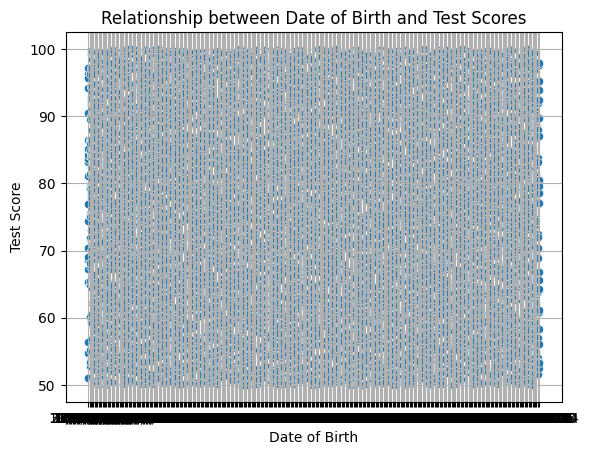

In [63]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define your SQLite database name
DB_NAME = 'student_management.db'

# Function to fetch all data from the students table
def fetch_all_students():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM students'
    df_students = pd.read_sql_query(query, conn)
    conn.close()
    return df_students

# Function to fetch all data from the results table
def fetch_all_results():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM results'
    df_results = pd.read_sql_query(query, conn)
    conn.close()
    return df_results

# Fetch all students data
df_students = fetch_all_students()

# Fetch all results data
df_results = fetch_all_results()

# Merge results with student data on student_id
df_age_scores = df_results.merge(df_students, on='student_id')

# Plotting with Seaborn
sns.scatterplot(data=df_age_scores, x='date_of_birth', y='score')
plt.title('Relationship between Date of Birth and Test Scores')
plt.xlabel('Date of Birth')
plt.ylabel('Test Score')
plt.grid(True)
plt.show()


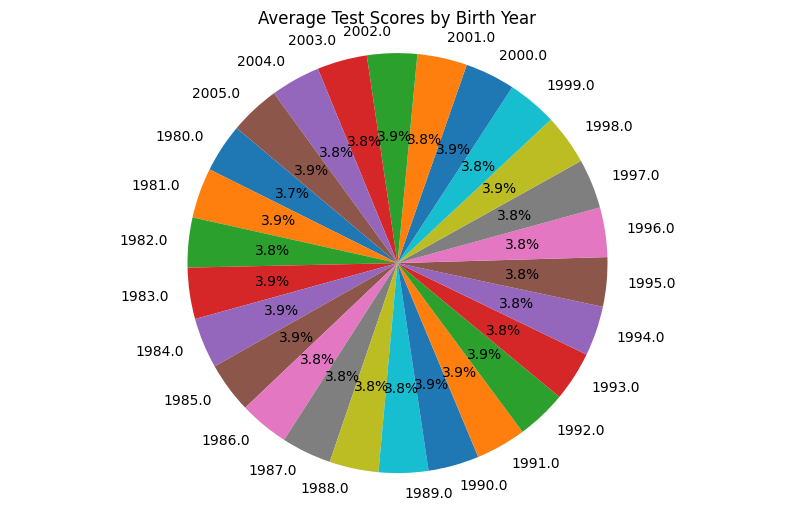

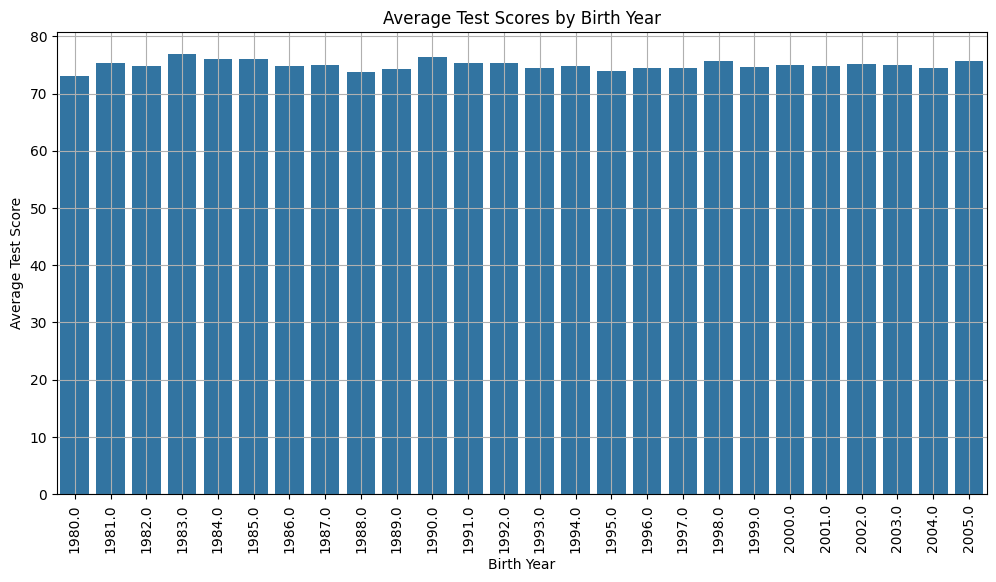

In [64]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define your SQLite database name
DB_NAME = 'student_management.db'

# Function to fetch all data from the students table
def fetch_all_students():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM students'
    df_students = pd.read_sql_query(query, conn)
    conn.close()
    return df_students

# Function to fetch all data from the results table
def fetch_all_results():
    conn = sqlite3.connect(DB_NAME)
    query = 'SELECT * FROM results'
    df_results = pd.read_sql_query(query, conn)
    conn.close()
    return df_results

# Fetch all students data
df_students = fetch_all_students()

# Fetch all results data
df_results = fetch_all_results()

# Merge results with student data on student_id
df_age_scores = df_results.merge(df_students, on='student_id')

# Convert date_of_birth to datetime format with correct format handling
df_age_scores['date_of_birth'] = pd.to_datetime(df_age_scores['date_of_birth'], format='%Y-%m-%d', errors='coerce')

# Extract birth years
df_age_scores['birth_year'] = df_age_scores['date_of_birth'].dt.year

# Calculate average score by birth year
avg_scores_by_year = df_age_scores.groupby('birth_year')['score'].mean().reset_index()

# Pie chart of average scores by birth year
plt.figure(figsize=(10, 6))
plt.pie(avg_scores_by_year['score'], labels=avg_scores_by_year['birth_year'], autopct='%1.1f%%', startangle=140)
plt.title('Average Test Scores by Birth Year')
plt.axis('equal')
plt.show()

# Bar chart of average scores by birth year
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_scores_by_year, x='birth_year', y='score')
plt.title('Average Test Scores by Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Average Test Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


# iv. Analyze the relationship between students' regional distribution and test scores using pandas

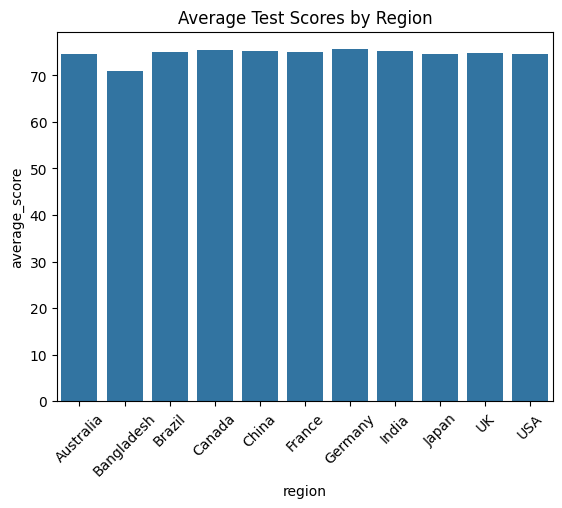

In [65]:
df_region_scores = df_results.merge(df_students, on='student_id').groupby('region').agg(average_score=('score', 'mean')).reset_index()
sns.barplot(data=df_region_scores, x='region', y='average_score')
plt.title('Average Test Scores by Region')
plt.xticks(rotation=45)
plt.show()


# v. Other analysis (e.g., correlation between different attributes)

Index(['result_id', 'student_id', 'course_id', 'score', 'name',
       'year_of_enrollment', 'major', 'gender', 'date_of_birth', 'region',
       'email'],
      dtype='object')


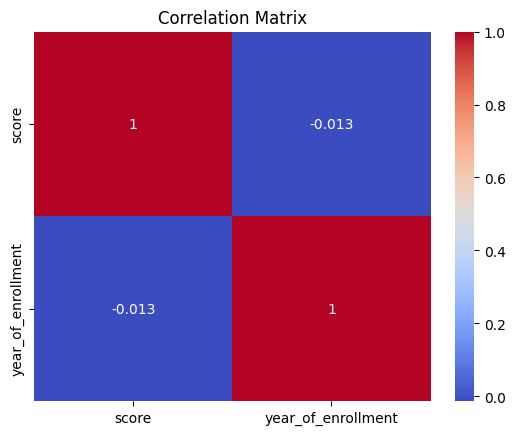

In [69]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

DB_NAME = 'student_management.db'

# Connect to the database
conn = sqlite3.connect(DB_NAME)

# Load data into DataFrames
df_students = pd.read_sql('SELECT * FROM students', conn)
df_results = pd.read_sql('SELECT * FROM results', conn)

# Merge data on student_id
df_all_data = df_results.merge(df_students, on='student_id')

# Verify columns in merged DataFrame
print(df_all_data.columns)

# Generate correlation matrix and plot
correlation_matrix = df_all_data[['score', 'year_of_enrollment']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Close the database connection
conn.close()


9. Generating Reports
# **New Section**

# **Build the GUI to Visualize the Results**

In [82]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.0 MB/s eta 0:00:00


# Please select any one option to see the output as table and in other chart

In [85]:
import sqlite3
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Connect to SQLite database
conn = sqlite3.connect('student_management.db')

# Function to fetch and display data
def fetch_data(query):
    try:
        df = pd.read_sql_query(query, conn)
        return df
    except Exception as e:
        print(f"Error fetching data: {str(e)}")
        return None

# Dropdown widget for selecting data visualization
dropdown = widgets.Dropdown(
    options=['Select Option', 'Show Students', 'Show Courses', 'Show Enrollments', 'Show Books'],
    value='Select Option',
    description='View:'
)

# Output widget for displaying data
output = widgets.Output()

# Function to update the output based on dropdown selection
def on_change(change):
    with output:
        clear_output()
        if change['new'] == 'Show Students':
            df = fetch_data("SELECT * FROM Students")
            if df is not None:
                display(df)
        elif change['new'] == 'Show Courses':
            df = fetch_data("SELECT * FROM Courses")
            if df is not None:
                display(df)
        elif change['new'] == 'Show Enrollments':
            df = fetch_data("SELECT * FROM Enrollments")
            if df is not None:
                display(df)
        elif change['new'] == 'Show Books':
            df = fetch_data("SELECT * FROM Books")
            if df is not None:
                display(df)

dropdown.observe(on_change, names='value')

# Display the dropdown and output
display(dropdown, output)


Dropdown(description='View:', options=('Select Option', 'Show Students', 'Show Courses', 'Show Enrollments', '…

Output()

# **DB Test Code**

In [88]:
import sqlite3

def test_database_operations():
    conn = sqlite3.connect('student_management.db')
    cursor = conn.cursor()

    try:
        # Test Insert Operation
        cursor.execute("INSERT INTO students (student_id, name, year_of_enrollment, major, gender, date_of_birth, region, email) "
                       "VALUES (2021521561110, 'John Dag', 2021, 'Computer Science', 'Male', '2003-01-15', 'Brazil', 'john.dag@example.com')")
        conn.commit()

        # Check if insert was successful by selecting the inserted record
        cursor.execute("SELECT * FROM students WHERE student_id = 2021521561110")
        student = cursor.fetchone()
        assert student is not None, "Insert Operation Failed: Student record not found after insert"

        # Test Update Operation
        cursor.execute("UPDATE students SET name = 'Jane Doe' WHERE student_id = 2021521561110")
        conn.commit()

        cursor.execute("SELECT name FROM students WHERE student_id = 2021521561110")
        student_name = cursor.fetchone()[0]
        assert student_name == 'Jane Doe', "Update Operation Failed: Name not updated correctly"

        # Test Delete Operation
        cursor.execute("DELETE FROM students WHERE student_id = 2021521561110")
        conn.commit()

        cursor.execute("SELECT * FROM students WHERE student_id = 2021521561110")
        student = cursor.fetchone()
        assert student is None, "Delete Operation Failed: Student record still exists after delete"

        print("All tests passed successfully.")

    except sqlite3.Error as e:
        print(f"SQLite error: {e}")
    except AssertionError as e:
        print(e)
    finally:
        conn.close()

# Run the test function
test_database_operations()


All tests passed successfully.


# **Run the Concurrent Query Tests**

In [93]:
import sqlite3
import threading

# Function to execute a query
def run_query(query):
    conn = sqlite3.connect('student_management.db')
    cursor = conn.cursor()
    try:
        cursor.execute(query)
        conn.commit()
    except sqlite3.Error as e:
        print(f"Error executing query: {e}")
    finally:
        conn.close()

# Queries to run concurrently
queries = [
    "INSERT INTO students (student_id, name, year_of_enrollment, major, gender, date_of_birth, region, email) VALUES (2021521561111, 'Alice', 2022, 'Mathematics', 'Female', '2000-01-01', 'USA', 'alice@example.com')",
    "INSERT INTO students (student_id, name, year_of_enrollment, major, gender, date_of_birth, region, email) VALUES (2021521561112, 'Bob', 2023, 'Physics', 'Male', '2001-02-02', 'Canada', 'bob@example.com')",
    "UPDATE students SET major = 'Engineering' WHERE student_id = 2023521462124",
    "DELETE FROM students WHERE student_id = 2023521462124"
]

# Create threads for concurrent execution
threads = []
for query in queries:
    thread = threading.Thread(target=run_query, args=(query,))
    threads.append(thread)
    thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()

print("Concurrent query tests completed.")


Concurrent query tests completed.


**save the gender ratio analysis as a CSV file:**

In [70]:
df_major_gender_ratio.to_csv('major_gender_ratio.csv', index=False)

**save a plot as an image:**

In [71]:
plt.savefig('age_vs_scores.png')

<Figure size 640x480 with 0 Axes>

**Closing the Connection**

In [94]:
conn.close()

# **Thank You **
# **# Student ID = 2021521460110**
# **Name = Adalat Khan Fahim **

